<a href="https://colab.research.google.com/github/onedayzero/Competitive-Teams-Winning-in-Valorant/blob/main/Predicting_Winner_in_Valorant.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predicting Why a Pro Valorant eSports Team Wins**
- Clint Atterberry


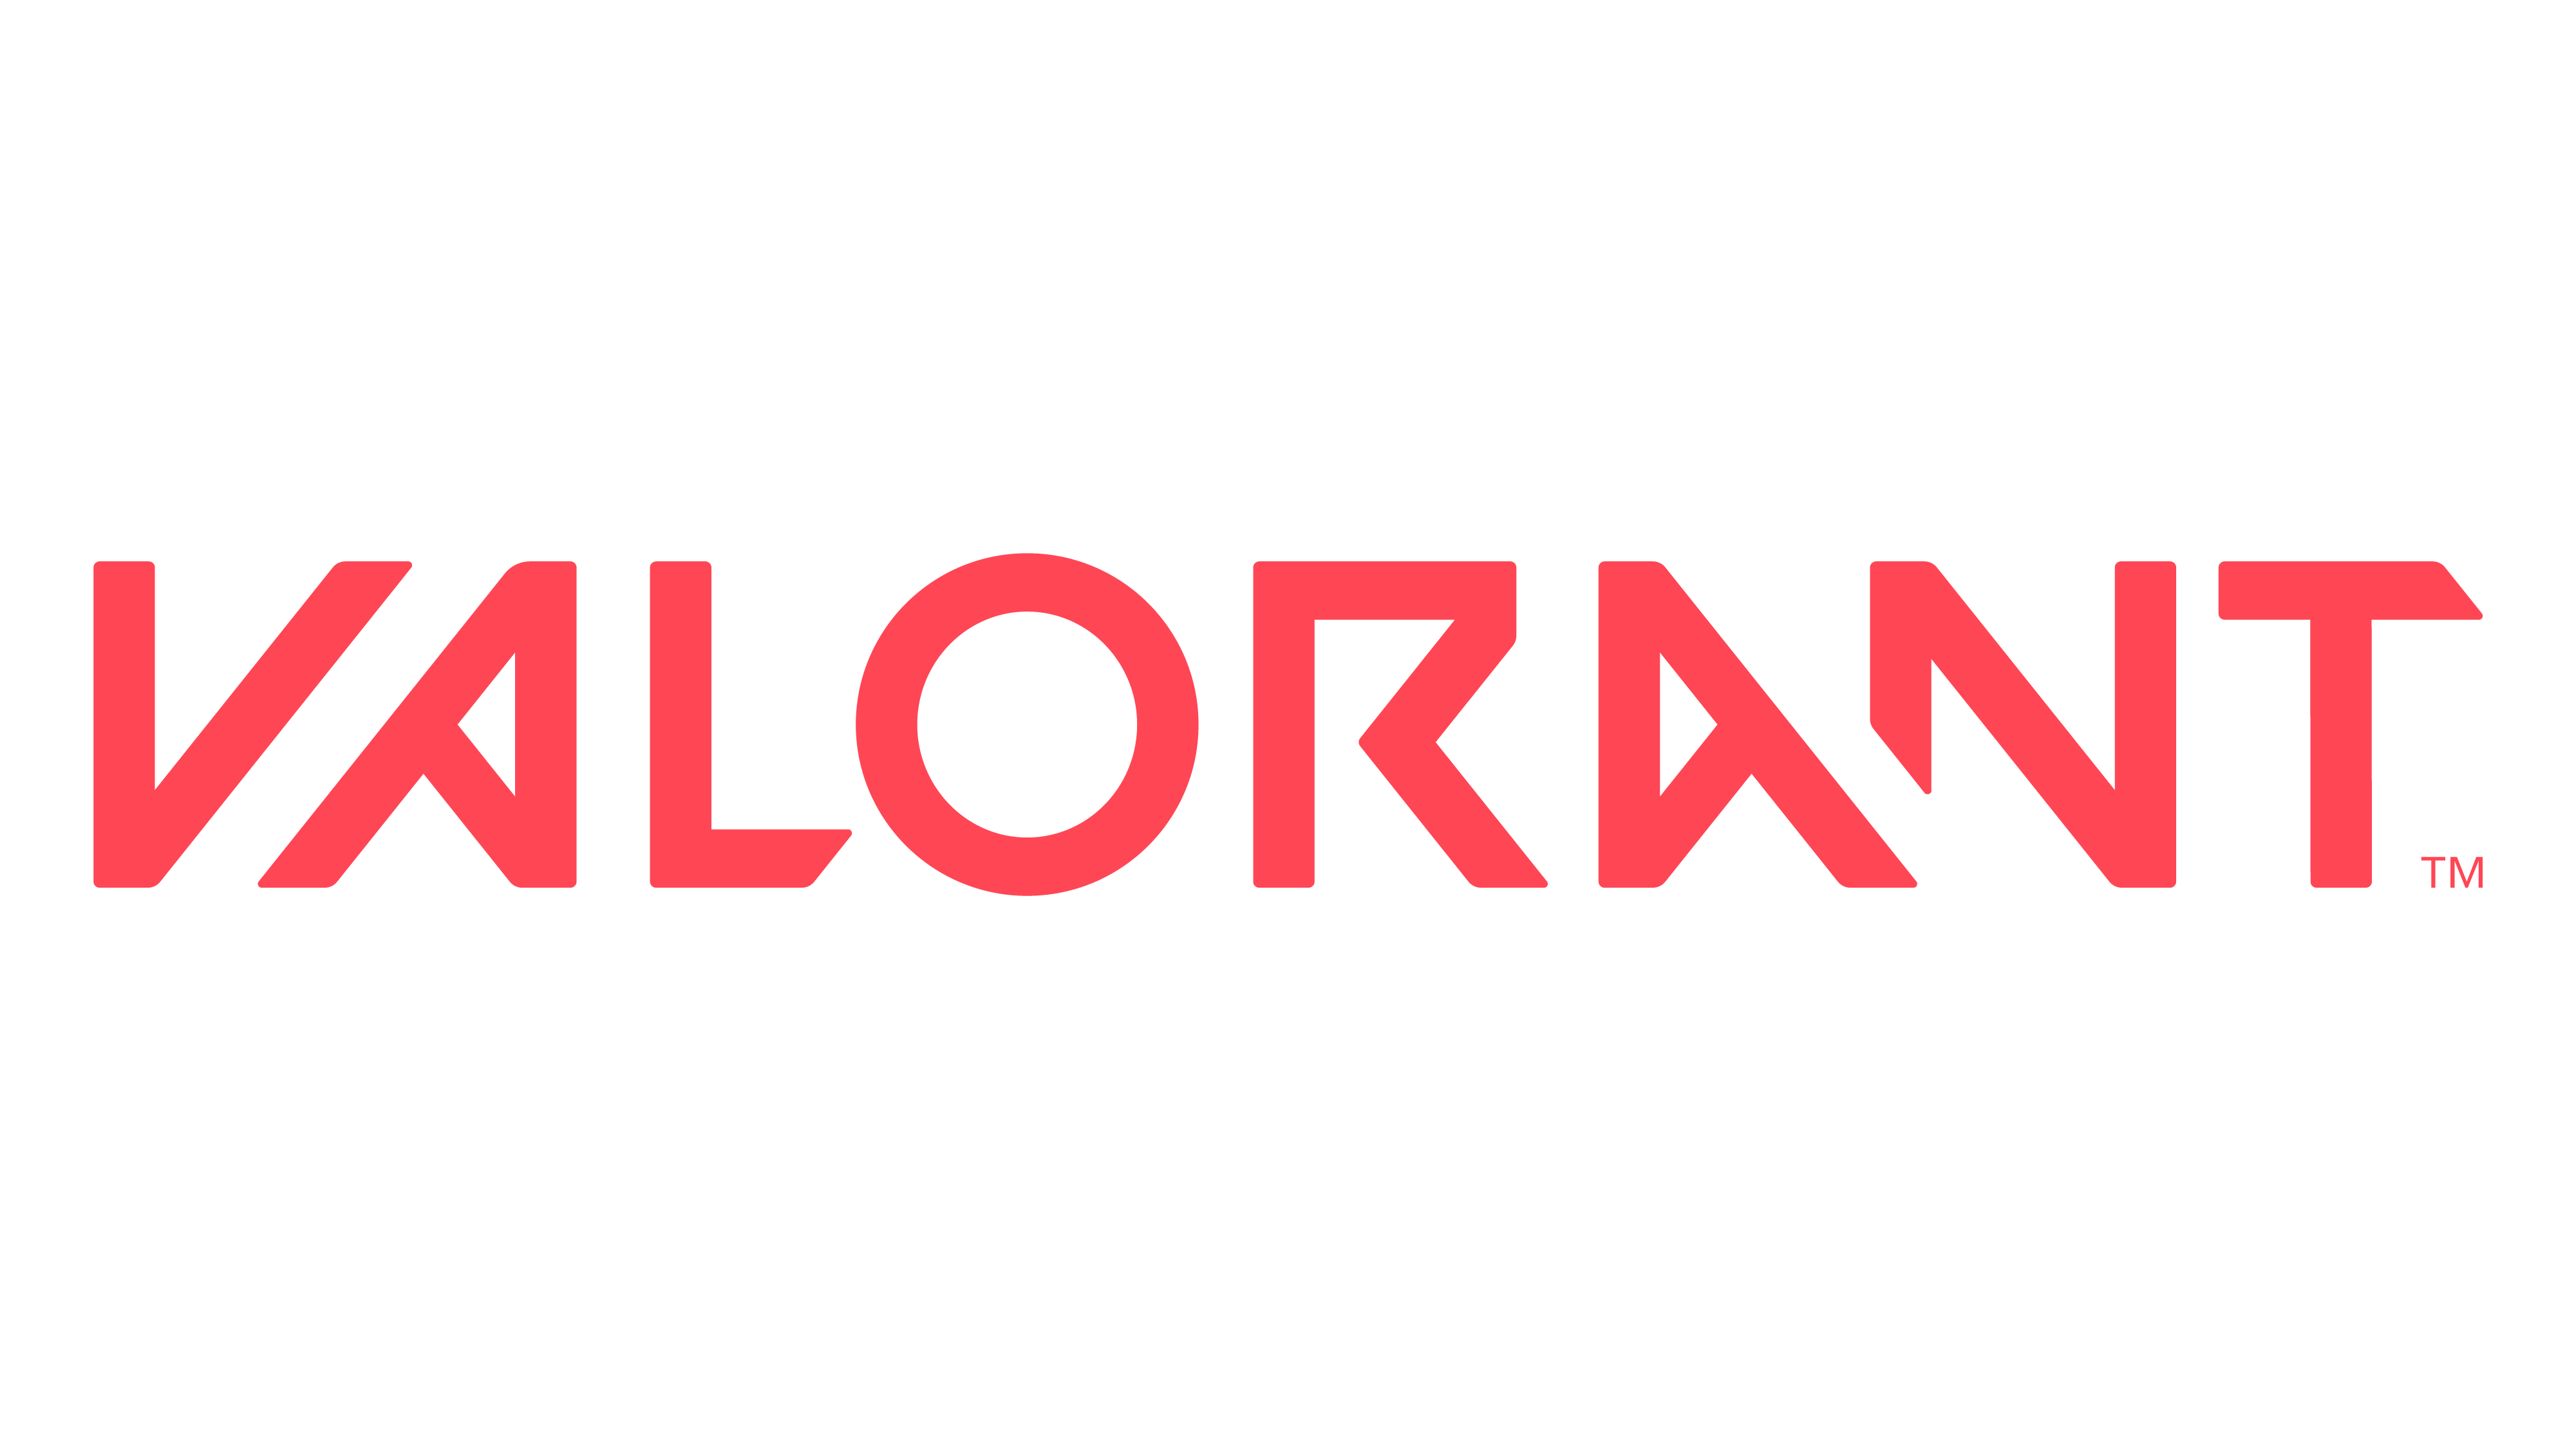

Image from the official Valorant Asset Kit [here](https://playvalorant.com/en-us/news/game-updates/valorant-asset-kit/).

The purpose of this project is to understand the ways a team wins in the game Valorant. Data was collected from over 10,0000 professional matches. I will be focusing on the First Half of the game to understand the connections between the types of guns bought for the rounds, the maps, and which side the teams started on, attack or defend.

- Initial Project Start  (14 July 2022)
- Revisions and Correlations Explored (21 July 2022)

# Setup

## Import Libraries

We will import the libraries we need for this project.

In [257]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(context='paper', style='darkgrid')

from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn import set_config
set_config(display='diagram')

## Load Data

The data was found from Kaggle [here](https://www.kaggle.com/datasets/visualize25/valorant-pro-matches-full-data). We will load it and view the first 5 rows.

In [258]:
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vRgfbORLFSODzyC5OGp0BWGWJ8VD7Vcx9DkjxBdnSgzfjxJmqAXlk-iyb8e6io3dYkjUCWtZuteOIZY/pub?output=csv')
df.head()

,GameID,MatchID,Map,Team1ID,Team2ID,Team1,Team2,Winner,Team1_TotalRounds,Team2_TotalRounds,...,Team1_FullBuyWon,Team2_PistolWon,Team2_Eco,Team2_EcoWon,Team2_SemiEco,Team2_SemiEcoWon,Team2_SemiBuy,Team2_SemiBuyWon,Team2_FullBuy,Team2_FullBuyWon
0,60894,62393,Breeze,6903,6020,Booster Seat Gaming,Pho Real,Booster Seat Gaming,13,7,...,8.0,0.0,4.0,0.0,2.0,0.0,4.0,1.0,10.0,6.0
1,60895,62393,Bind,6903,6020,Booster Seat Gaming,Pho Real,Pho Real,2,13,...,1.0,2.0,2.0,2.0,0.0,0.0,4.0,3.0,9.0,8.0
2,60896,62393,Haven,6903,6020,Booster Seat Gaming,Pho Real,Booster Seat Gaming,13,8,...,9.0,1.0,2.0,1.0,2.0,0.0,6.0,2.0,11.0,5.0
3,60924,62403,Icebox,7046,7047,Bjor's Kittens,Mugiwara,Bjor's Kittens,13,6,...,8.0,0.0,4.0,0.0,1.0,0.0,2.0,1.0,12.0,5.0
4,60925,62403,Haven,7046,7047,Bjor's Kittens,Mugiwara,Bjor's Kittens,13,9,...,11.0,1.0,3.0,2.0,3.0,0.0,4.0,3.0,12.0,4.0


In [259]:
df.shape

(15888, 36)

There is a lot of data, 15,888 rows over 36 columns.

# Delete Unnecessary Columns

*Look at all of the column names.*

In [260]:
df.columns

Index(['GameID', 'MatchID', 'Map', 'Team1ID', 'Team2ID', 'Team1', 'Team2',
       'Winner', 'Team1_TotalRounds', 'Team2_TotalRounds',
       'Team1_SideFirstHalf', 'Team2_SideFirstHalf', 'Team1_RoundsFirstHalf',
       'Team1_RoundsSecondtHalf', 'Team1_RoundsOT', 'Team2_RoundsFirstHalf',
       'Team2_RoundsSecondtHalf', 'Team2_RoundsOT', 'Team1_PistolWon',
       'Team1_Eco', 'Team1_EcoWon', 'Team1_SemiEco', 'Team1_SemiEcoWon',
       'Team1_SemiBuy', 'Team1_SemiBuyWon', 'Team1_FullBuy',
       'Team1_FullBuyWon', 'Team2_PistolWon', 'Team2_Eco', 'Team2_EcoWon',
       'Team2_SemiEco', 'Team2_SemiEcoWon', 'Team2_SemiBuy',
       'Team2_SemiBuyWon', 'Team2_FullBuy', 'Team2_FullBuyWon'],
      dtype='object')

In [261]:
df = df.drop(columns=['GameID',                 # Identifer Variable, not needed
                      'MatchID',                # Identifer Variable, not needed
                      'Team1ID',                # Identifer Variable, not needed
                      'Team2ID',                # Identifer Variable, not needed
                      'Team2_SideFirstHalf'     # Not needed when we have Team1_SideFirstHalf
                      ])
df.head()

,Map,Team1,Team2,Winner,Team1_TotalRounds,Team2_TotalRounds,Team1_SideFirstHalf,Team1_RoundsFirstHalf,Team1_RoundsSecondtHalf,Team1_RoundsOT,...,Team1_FullBuyWon,Team2_PistolWon,Team2_Eco,Team2_EcoWon,Team2_SemiEco,Team2_SemiEcoWon,Team2_SemiBuy,Team2_SemiBuyWon,Team2_FullBuy,Team2_FullBuyWon
0,Breeze,Booster Seat Gaming,Pho Real,Booster Seat Gaming,13,7,defend,7,6,0,...,8.0,0.0,4.0,0.0,2.0,0.0,4.0,1.0,10.0,6.0
1,Bind,Booster Seat Gaming,Pho Real,Pho Real,2,13,defend,2,0,0,...,1.0,2.0,2.0,2.0,0.0,0.0,4.0,3.0,9.0,8.0
2,Haven,Booster Seat Gaming,Pho Real,Booster Seat Gaming,13,8,attack,8,5,0,...,9.0,1.0,2.0,1.0,2.0,0.0,6.0,2.0,11.0,5.0
3,Icebox,Bjor's Kittens,Mugiwara,Bjor's Kittens,13,6,defend,7,6,0,...,8.0,0.0,4.0,0.0,1.0,0.0,2.0,1.0,12.0,5.0
4,Haven,Bjor's Kittens,Mugiwara,Bjor's Kittens,13,9,defend,9,4,0,...,11.0,1.0,3.0,2.0,3.0,0.0,4.0,3.0,12.0,4.0


# Duplicated Data

*I will explore the dataframe looking for duplicated rows.*

In [262]:
print(f'There were {df.duplicated().sum()} duplicated rows')
df.drop_duplicates(inplace=True)
print(f'There are now {df.duplicated().sum()} duplicated rows')

There were 4 duplicated rows
There are now 0 duplicated rows


# Missing Data

*Looking for missing data per column.*

In [263]:
print(f'Columns with missing values:\n\n{df.isna().sum()}\n')
Val_df = df.dropna()
print(f'Columns with missing values:\n\n{Val_df.isna().sum()}')

Columns with missing values:

Map                           0
Team1                         0
Team2                         0
Winner                        0
Team1_TotalRounds             0
Team2_TotalRounds             0
Team1_SideFirstHalf           0
Team1_RoundsFirstHalf         0
Team1_RoundsSecondtHalf       0
Team1_RoundsOT                0
Team2_RoundsFirstHalf         0
Team2_RoundsSecondtHalf       0
Team2_RoundsOT                0
Team1_PistolWon            1034
Team1_Eco                  1034
Team1_EcoWon               1034
Team1_SemiEco              1034
Team1_SemiEcoWon           1034
Team1_SemiBuy              1034
Team1_SemiBuyWon           1034
Team1_FullBuy              1034
Team1_FullBuyWon           1034
Team2_PistolWon            1034
Team2_Eco                  1034
Team2_EcoWon               1034
Team2_SemiEco              1034
Team2_SemiEcoWon           1034
Team2_SemiBuy              1034
Team2_SemiBuyWon           1034
Team2_FullBuy              1034
Team2_Full

In [264]:
# Reset Index
Val_df = Val_df.reset_index(drop=True)

# Inconsistencies in Data of Categorical Columns

https://stackoverflow.com/questions/67981550/how-to-filter-and-find-out-all-the-columns-of-a-certain-data-type-in-pandas-data used as reference to select object data

In [265]:
col = Val_df.select_dtypes('object').columns.to_list()

# create a For Loop to analyze value counts of object columns
for col in Val_df[col]:
    print(Val_df[col].value_counts())
    print('\n')

Ascent      3643
Haven       3205
Bind        3069
Split       2223
Icebox      1942
Breeze       661
Fracture     107
Name: Map, dtype: int64


Renegades       206
Sentinels       146
Soniqs          129
Envy            125
Paper Rex       123
               ... 
Arcana            1
LAGOS             1
IC9               1
Lycus Empire      1
GoodVibes         1
Name: Team1, Length: 1150, dtype: int64


Renegades            78
Luminosity           78
Team Basilisk        76
Enigma Gaming        72
Team SMG             68
                     ..
Weird Esports         1
Beyond Infinity       1
Equinox Day           1
Zeusaberz Esports     1
GRANIT GAMING         1
Name: Team2, Length: 1990, dtype: int64


Renegades      187
Sentinels      139
Soniqs         133
Complexity     118
Paper Rex      117
              ... 
Boca Boston      1
ALFA Esport      1
CANAVARLAR       1
Demon            1
GoodVibes        1
Name: Winner, Length: 1306, dtype: int64


defend    7547
attack    7303
Name:

## Number Summary of Numeric Columns

https://pandas.pydata.org/docs/getting_started/intro_tutorials/03_subset_data.html
used as reference

In [266]:
num_df = Val_df.select_dtypes(exclude='object')     # Creating a dataframe of
                                                    # just numeric data
num_df.iloc[:,:11].describe().round(2)

,Team1_TotalRounds,Team2_TotalRounds,Team1_RoundsFirstHalf,Team1_RoundsSecondtHalf,Team1_RoundsOT,Team2_RoundsFirstHalf,Team2_RoundsSecondtHalf,Team2_RoundsOT,Team1_PistolWon,Team1_Eco,Team1_EcoWon
count,14850.00,14850.00,14850.00,14850.00,14850.00,14850.00,14850.00,14850.00,14850.00,14850.00,14850.00
mean,12.01,8.52,7.11,4.68,0.22,4.89,3.49,0.15,1.15,2.83,1.24
std,2.67,3.95,2.39,2.15,0.85,2.39,2.48,0.67,0.70,0.80,0.73
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
25%,13.00,5.00,5.00,3.00,0.00,3.00,1.00,0.00,1.00,2.00,1.00
50%,13.00,9.00,7.00,5.00,0.00,5.00,3.00,0.00,1.00,3.00,1.00
75%,13.00,13.00,9.00,6.00,0.00,7.00,5.00,0.00,2.00,3.00,2.00
max,22.00,21.00,12.00,12.00,10.00,12.00,11.00,9.00,2.00,22.00,11.00


In [267]:
num_df.iloc[:,11:].describe().round(2)

,Team1_SemiEco,Team1_SemiEcoWon,Team1_SemiBuy,Team1_SemiBuyWon,Team1_FullBuy,Team1_FullBuyWon,Team2_PistolWon,Team2_Eco,Team2_EcoWon,Team2_SemiEco,Team2_SemiEcoWon,Team2_SemiBuy,Team2_SemiBuyWon,Team2_FullBuy,Team2_FullBuyWon
count,14850.00,14850.00,14850.00,14850.00,14850.00,14850.00,14850.00,14850.00,14850.00,14850.00,14850.00,14850.00,14850.00,14850.00,14850.00
mean,1.17,0.27,4.13,2.53,12.42,7.97,0.85,3.10,0.92,1.83,0.26,4.59,2.03,11.02,5.31
std,1.08,0.51,1.92,1.36,3.29,2.66,0.70,0.82,0.74,1.12,0.50,2.07,1.42,4.02,3.26
min,0.00,0.00,0.00,0.00,2.00,0.00,0.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,3.00,2.00,10.00,7.00,0.00,3.00,0.00,1.00,0.00,3.00,1.00,8.00,3.00
50%,1.00,0.00,4.00,2.00,12.00,8.00,1.00,3.00,1.00,2.00,0.00,4.00,2.00,11.00,5.00
75%,2.00,0.00,5.00,3.00,14.00,10.00,1.00,4.00,1.00,3.00,0.00,6.00,3.00,14.00,8.00
max,6.00,4.00,15.00,9.00,35.00,19.00,2.00,22.00,11.00,6.00,3.00,14.00,8.00,35.00,18.00


# Univariate Visualizations of the Data

*I will create a countplot for the distribution of maps that were selected throughout the data.*

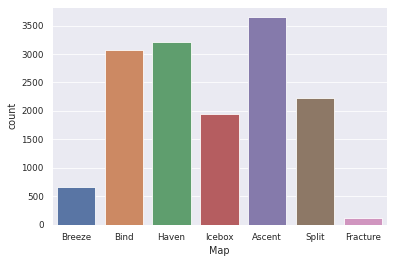

In [268]:
sns.countplot(x=Val_df['Map']);

This graphic shows me that the newer maps, Icebox, Breeze, and Fracture are the least selected maps by teams. The most selected is Ascent, the least is Split. I do not have the info on which maps the teams banned so that cannot be compared at this time.

## Boxplots

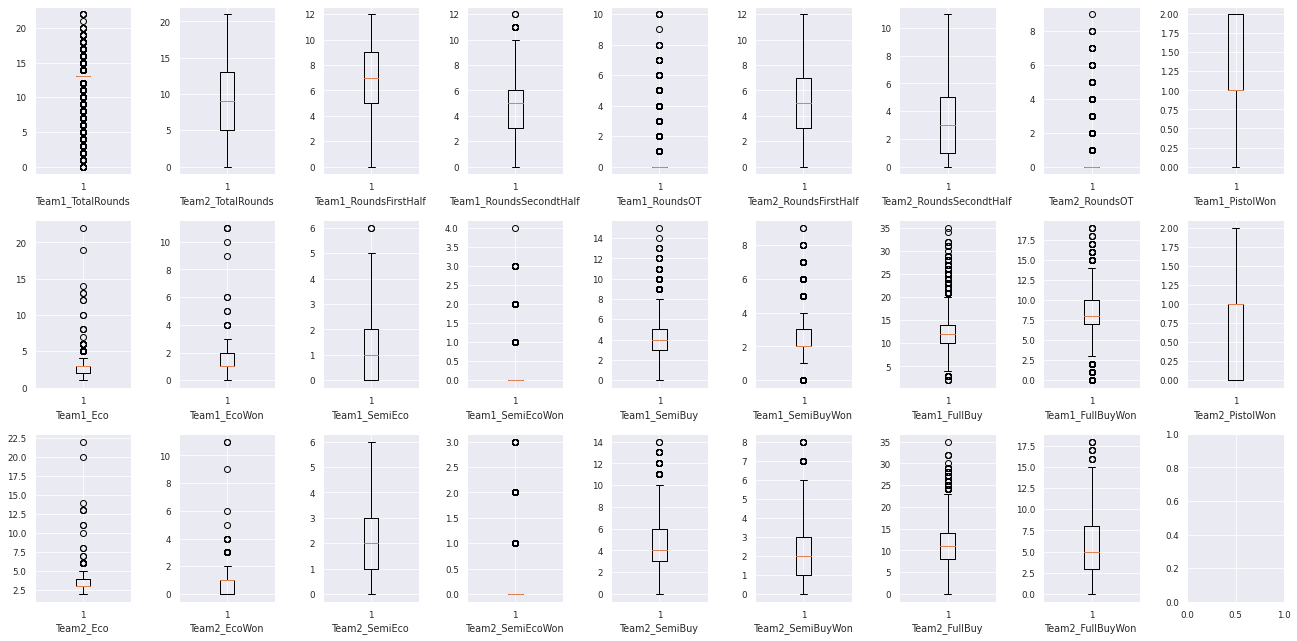

In [269]:
fig, axes = plt.subplots(3,9, figsize = (18,9))
axes = axes.ravel()
for i, col in enumerate(num_df):
    axes[i].boxplot(num_df[col])
    axes[i].set_xlabel(f'{col}')
    
fig.tight_layout()

## Histograms

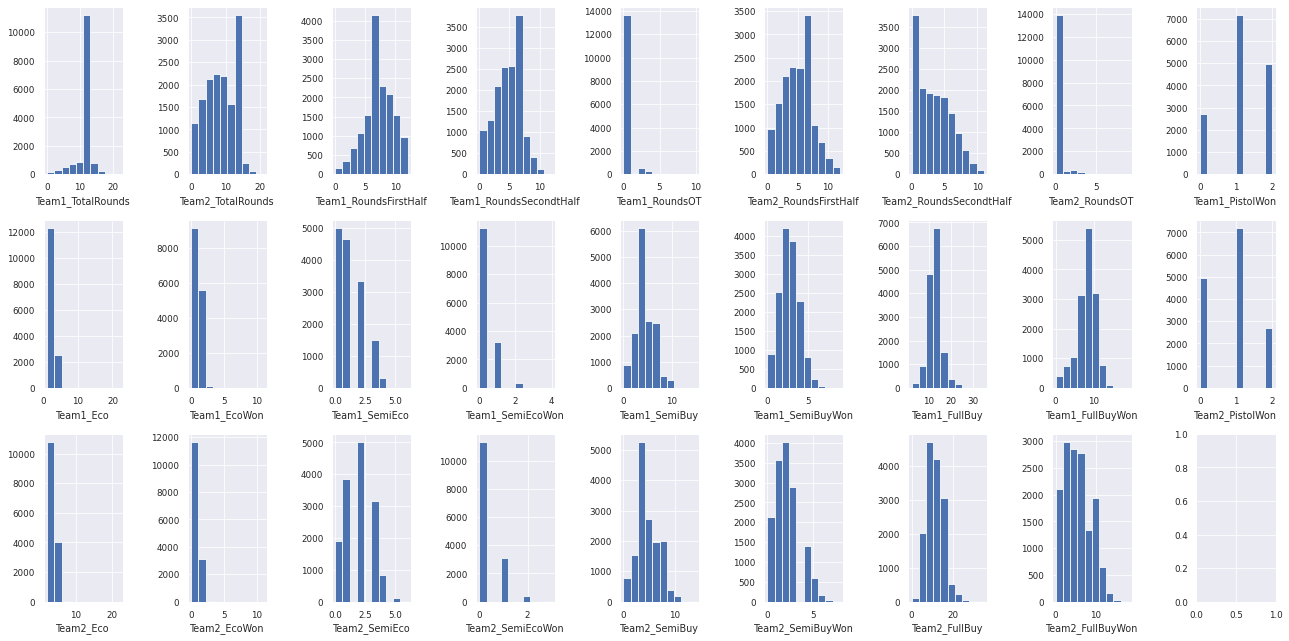

In [270]:
fig, axes = plt.subplots(3,9, figsize = (18,9))
axes = axes.ravel()
for k, col in enumerate(num_df):
    axes[k].hist(num_df[col])
    axes[k].set_xlabel(f'{col}')

fig.tight_layout()

## Analysis of Univariate Graphs

Some data appears to be fairly/roughly symmetrical while a lot of the the data is heavily skewed with outliers. The columns, in context of the data, that stick out to me are 'Team1_RoundsFirstHalf' and 'Team1_PistolWon'.

1. The first one sticks out particularly because 'Team1_RoundsFirstHalf' is counting how many rounds that Team1, the team that selected the map, won out of the 12. This data sticks out because the data ranges from 0 to 12, some teams didn't win any while some won all 12, neither of which are outliers, and the median is at 7 while the quartiles are at 5 and 9. **This tells me that the team that selects the map tends to win more rounds in the first half.**

2. The second one sticks out because it is measuring how many first round wins for each have the team has. During the first round for each half, the teams start with only enough money to purchase pistols and similar handguns. **The team that selects the map is heavily favored to win those rounds according to this data.**

# Correlations of the Features

In [271]:
num_df.corr().round(2)

,Team1_TotalRounds,Team2_TotalRounds,Team1_RoundsFirstHalf,Team1_RoundsSecondtHalf,Team1_RoundsOT,Team2_RoundsFirstHalf,Team2_RoundsSecondtHalf,Team2_RoundsOT,Team1_PistolWon,Team1_Eco,...,Team1_FullBuyWon,Team2_PistolWon,Team2_Eco,Team2_EcoWon,Team2_SemiEco,Team2_SemiEcoWon,Team2_SemiBuy,Team2_SemiBuyWon,Team2_FullBuy,Team2_FullBuyWon
Team1_TotalRounds,1.00,-0.40,0.54,0.50,0.34,-0.54,-0.19,0.24,0.30,-0.19,...,0.78,-0.30,0.23,-0.31,0.41,0.03,0.16,-0.21,0.03,-0.34
Team2_TotalRounds,-0.40,1.00,-0.74,0.18,0.36,0.74,0.78,0.37,-0.43,0.38,...,-0.22,0.43,-0.18,0.44,-0.32,0.11,0.03,0.49,0.82,0.88
Team1_RoundsFirstHalf,0.54,-0.74,1.00,-0.39,-0.12,-1.00,-0.19,-0.11,0.32,-0.25,...,0.41,-0.32,0.10,-0.34,0.33,-0.08,0.07,-0.31,-0.52,-0.67
Team1_RoundsSecondtHalf,0.50,0.18,-0.39,1.00,0.16,0.39,-0.13,0.14,0.05,0.01,...,0.38,-0.05,0.19,-0.03,0.13,0.11,0.10,0.04,0.39,0.19
Team1_RoundsOT,0.34,0.36,-0.12,0.16,1.00,0.12,0.26,0.71,-0.06,0.07,...,0.34,0.06,-0.03,0.06,-0.00,0.04,0.04,0.12,0.56,0.36
Team2_RoundsFirstHalf,-0.54,0.74,-1.00,0.39,0.12,1.00,0.19,0.11,-0.32,0.25,...,-0.41,0.32,-0.10,0.34,-0.33,0.08,-0.07,0.31,0.52,0.67
Team2_RoundsSecondtHalf,-0.19,0.78,-0.19,-0.13,0.26,0.19,1.00,0.22,-0.36,0.35,...,-0.03,0.36,-0.18,0.36,-0.18,0.10,0.11,0.45,0.67,0.65
Team2_RoundsOT,0.24,0.37,-0.11,0.14,0.71,0.11,0.22,1.00,-0.06,0.06,...,0.25,0.06,-0.03,0.06,-0.02,0.03,0.05,0.11,0.51,0.39
Team1_PistolWon,0.30,-0.43,0.32,0.05,-0.06,-0.32,-0.36,-0.06,1.00,-0.68,...,-0.14,-1.00,0.58,-0.91,0.09,0.03,-0.42,-0.47,-0.14,-0.11
Team1_Eco,-0.19,0.38,-0.25,0.01,0.07,0.25,0.35,0.06,-0.68,1.00,...,0.16,0.68,-0.29,0.72,-0.10,-0.01,0.30,0.39,0.18,0.13


### Features with Moderate to High Correlation
Using r values > 0.6

|Feature 1|Feature 2|Correlation|
|-|-|-|
|Team1_TotalRounds|Team1_FullBuyWon|0.78|
|Team2_RoundsFirstHalf|Team2_TotalRounds|0.74|
|Team1_RoundsFirstHalf|Team2_FullBuyWon|-0.67|
|Team1_PistolWon|Team1_EcoWon|0.89|
|Team1_FullBuy|Team1_FullBuyWon|0.71|
|Team2_PistolWon|Team1_Eco|0.68|
|Team2_PistolWon|Team1_EcoWon|-0.89|
|Team2_PistolWon|Team2_EcoWon|0.91|
|Team2_FullBuy|Team2_FullBuyWon|0.87|

# Creating multivariate exploratory visuals to further understand your data


https://seaborn.pydata.org/generated/seaborn.barplot.html used as reference

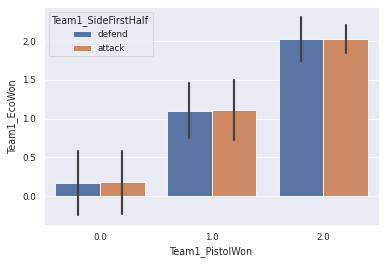

In [272]:
sns.barplot(
    data=Val_df,
    x='Team1_PistolWon',
    y='Team1_EcoWon',
    hue='Team1_SideFirstHalf',
    ci="sd"
    );

This graphs shows us that after Team1 wins the pistol round, they generally do well in the following eco round and it doesn't matter if they are Attack or Defend.

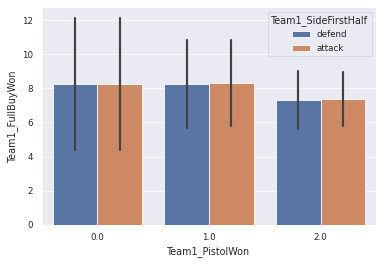

In [273]:
sns.barplot(
    data=Val_df,
    x='Team1_PistolWon',
    y='Team1_FullBuyWon',
    hue='Team1_SideFirstHalf',
    ci="sd"
    );

This graph is interesting because it shows that teams that win both halve's pistol rounds **do not appear to have an advantage** when they are playing in a full buy gun round.

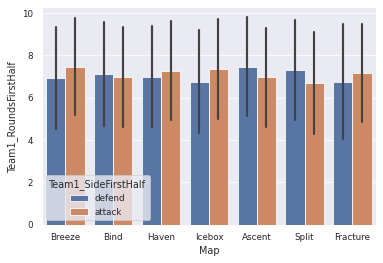

In [274]:
sns.barplot(
    data=Val_df,
    x='Map',
    y='Team1_RoundsFirstHalf',
    hue='Team1_SideFirstHalf',
    ci="sd"
    );

This graph shows that every map is slightly different with their mean rounds won in the first map on each map; however, the data is not that spread and Team1 generally wins morethan half of the rounds (the means are all greater than 6) across all maps whether they are attacking or not.

# Presentation Visuals

- https://livecodestream.dev/post/how-to-build-beautiful-plots-with-python-and-seaborn
- https://seaborn.pydata.org/examples/spreadsheet_heatmap.html

as reference

**Countplot of Team1's First Half Rounds Won Depending on their Pistol Rounds**

---
The following visual shows how the team that selects the map, more often than not wins the first rounds of the half. We see this with the 2 bars being twice as tall as the 0 bars. There is not much of an obvious gap between if the team is attacking or defending.

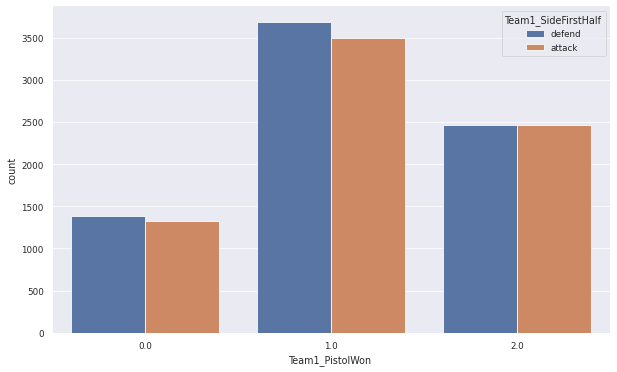

In [275]:
f, ax = plt.subplots(figsize=(10, 6))

sns.countplot(x='Team1_PistolWon', data=Val_df, hue='Team1_SideFirstHalf', );
sns.set_style('ticks')
sns.despine()
sns.set_context('talk')

**Heatmap of Team1's Results Based on Map**

---
The following visual shows how the new map, Fracture, has the most variance at the time that data was collected. Generally speaking, if the team that selects the map tends to win the pistol round (lots of 1's and 2's), which leads to winning a majority of the first half rounds (greater than 6 is more than half of the rounds), and this is true across all maps with the most variance on Fracture.

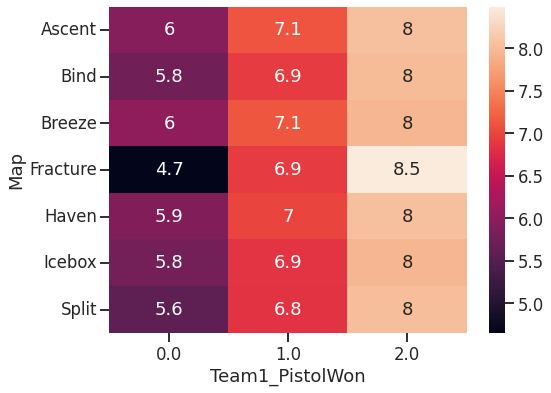

In [276]:
f, ax = plt.subplots(figsize=(8, 6))

pivot = Val_df.pivot_table(
    index=['Map'],
    columns=['Team1_PistolWon'],
    values='Team1_RoundsFirstHalf',
    aggfunc=np.average)
sns.heatmap(pivot,
            annot=True
            );

sns.set_context('talk')

# Machine Learning

### Prepare data

In [277]:
# Create new column that determines if Team1 won the match
Val_df['Team1_Won'] = Val_df.loc[:, 'Team1'] == Val_df.loc[:, 'Winner']



# Drop Team1, Team2, and Winner columns
Val_df = Val_df.drop(columns=['Team1','Team2','Winner'])
Val_df.head()

,Map,Team1_TotalRounds,Team2_TotalRounds,Team1_SideFirstHalf,Team1_RoundsFirstHalf,Team1_RoundsSecondtHalf,Team1_RoundsOT,Team2_RoundsFirstHalf,Team2_RoundsSecondtHalf,Team2_RoundsOT,...,Team2_PistolWon,Team2_Eco,Team2_EcoWon,Team2_SemiEco,Team2_SemiEcoWon,Team2_SemiBuy,Team2_SemiBuyWon,Team2_FullBuy,Team2_FullBuyWon,Team1_Won
0,Breeze,13,7,defend,7,6,0,5,2,0,...,0.0,4.0,0.0,2.0,0.0,4.0,1.0,10.0,6.0,True
1,Bind,2,13,defend,2,0,0,10,3,0,...,2.0,2.0,2.0,0.0,0.0,4.0,3.0,9.0,8.0,False
2,Haven,13,8,attack,8,5,0,4,4,0,...,1.0,2.0,1.0,2.0,0.0,6.0,2.0,11.0,5.0,True
3,Icebox,13,6,defend,7,6,0,5,1,0,...,0.0,4.0,0.0,1.0,0.0,2.0,1.0,12.0,5.0,True
4,Haven,13,9,defend,9,4,0,3,6,0,...,1.0,3.0,2.0,3.0,0.0,4.0,3.0,12.0,4.0,True


In [278]:
# by using normalize = True with value_counts, our output is the percentage of each class (written as a decimal)
Val_df['Team1_Won'].value_counts(normalize = True)

True     0.769832
False    0.230168
Name: Team1_Won, dtype: float64

The data is very heavily skewed towards Team1 winning the match.

In [279]:
print(Val_df['Map'].unique())

['Breeze' 'Bind' 'Haven' 'Icebox' 'Ascent' 'Split' 'Fracture']


In [280]:
# Convert String Values to Numeric Values
Val_df['Map'] = Val_df['Map'].replace({'Breeze':0, 'Bind':1, 'Haven':2, 'Icebox':3, 'Ascent':4, 'Split':5, 'Fracture':6})
Val_df['Team1_SideFirstHalf'] = Val_df['Team1_SideFirstHalf'].replace({'defend':0, 'attack':1})

# Convert Boolean Values to Numberic Values
Val_df['Team1_Won'] = Val_df['Team1_Won'].replace({False:0, True:1})

Val_df.head()

,Map,Team1_TotalRounds,Team2_TotalRounds,Team1_SideFirstHalf,Team1_RoundsFirstHalf,Team1_RoundsSecondtHalf,Team1_RoundsOT,Team2_RoundsFirstHalf,Team2_RoundsSecondtHalf,Team2_RoundsOT,...,Team2_PistolWon,Team2_Eco,Team2_EcoWon,Team2_SemiEco,Team2_SemiEcoWon,Team2_SemiBuy,Team2_SemiBuyWon,Team2_FullBuy,Team2_FullBuyWon,Team1_Won
0,0,13,7,0,7,6,0,5,2,0,...,0.0,4.0,0.0,2.0,0.0,4.0,1.0,10.0,6.0,1
1,1,2,13,0,2,0,0,10,3,0,...,2.0,2.0,2.0,0.0,0.0,4.0,3.0,9.0,8.0,0
2,2,13,8,1,8,5,0,4,4,0,...,1.0,2.0,1.0,2.0,0.0,6.0,2.0,11.0,5.0,1
3,3,13,6,0,7,6,0,5,1,0,...,0.0,4.0,0.0,1.0,0.0,2.0,1.0,12.0,5.0,1
4,2,13,9,0,9,4,0,3,6,0,...,1.0,3.0,2.0,3.0,0.0,4.0,3.0,12.0,4.0,1


In [281]:
# Split the data into training and validation sets
X = Val_df.drop(columns='Team1_Won')
y = Val_df['Team1_Won']

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Random Forest Classifier

In [282]:
# Make an Instance
rf = RandomForestClassifier(random_state = 42)

In [283]:
# Fit data
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [284]:
# Predict the value for y
rf.predict(X_test)

array([1, 0, 1, ..., 1, 1, 1])

In [285]:
# Evaluate the performacerf_train_score = rf.score(X_train, y_train)
rf_train_score = rf.score(X_train, y_train)
rf_test_score = rf.score(X_test, y_test)
print(rf_train_score)
print(rf_test_score)

1.0
1.0


**The model is overfit. The prediction of 1 on the test is "too" perfect. I will tune the model so that it is more realistic and usuable.**

In [286]:
# I will start by setting the max depth to 2
rf_2 = RandomForestClassifier(max_depth = 2, random_state = 42)
rf_2.fit(X_train, y_train)
rf_2_train_score = rf_2.score(X_train, y_train)
rf_2_test_score = rf_2.score(X_test, y_test)
print(rf_2_train_score)
print(rf_2_test_score)

0.9859926371554278
0.9862644761648263


**This looks much better and does not appear to be overfit as the previous model.**

In [287]:
# I am going to find out what is the max depth
est_depths = [estimator.get_depth() for estimator in rf.estimators_]
max(est_depths)

16

The max depth is 16.

In [288]:
from scipy.sparse.construct import random
# I will try different values for max depth to continue
# evaluating the dataset.

depths = range(1, max(est_depths))
scores = pd.DataFrame(index=depths, columns=['Test Score'])
for depth in depths:    
   model = RandomForestClassifier(max_depth=depth, random_state=42)
   model.fit(X_train, y_train)
   scores.loc[depth, 'Train Score'] = model.score(X_train, y_train)
   scores.loc[depth, 'Test Score'] = model.score(X_test, y_test)
   scores.head()

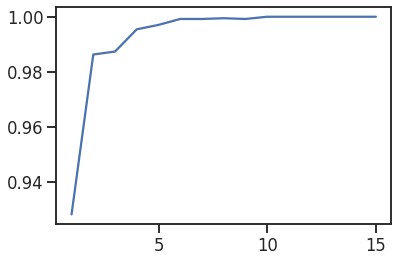

In [289]:
# I will plot the different scores by depth
plt.plot(scores['Test Score']);

It appears around the depth of 5 might yield the best results.

In [290]:
# I will look at the scores and sort them from highest to lowest
sorted_scores = scores.sort_values(by='Test Score', ascending=False)
sorted_scores.head(10)

,Test Score,Train Score
10,1.0,1.000000
11,1.0,1.000000
12,1.0,1.000000
13,1.0,1.000000
14,1.0,1.000000
15,1.0,1.000000
8,0.999461,1.000000
6,0.999192,0.999641
7,0.999192,0.999910
9,0.999192,1.000000


I will use a depth of **6** because neither score is *perfect*. I do not want to overfit the model by having a perfect score.

### Tuning n_estimators

In [291]:
# choose a couple of values for n_estimators to save time
# you can use another loop later to narrow down the best number
# by trying numbers close to the best one
n_ests = [2, 3, 4, 5, 6, 7, 8, 9, 10]
scores2 = pd.DataFrame(index=n_ests, columns=['Test Score', 'Train Score'])
for n in n_ests:
   model = RandomForestClassifier(max_depth=6, n_estimators=n, random_state=42)
   model.fit(X_train, y_train)
   scores2.loc[n, 'Train Score'] = model.score(X_train, y_train)
   scores2.loc[n, 'Test Score'] = model.score(X_test, y_test)
scores2.head()

,Test Score,Train Score
2,0.998923,0.998923
3,0.999731,0.999192
4,0.999461,0.999551
5,0.999731,0.999641
6,0.999461,0.999641


In [292]:
sorted_scores2 = scores2.sort_values(by='Test Score', ascending=False)
sorted_scores2.head()

,Test Score,Train Score
3,0.999731,0.999192
5,0.999731,0.999641
7,0.999731,0.999731
4,0.999461,0.999551
6,0.999461,0.999641


Using a max depth of 6 and a value of 3 for the n estimators, the model should be extremely accurate. However, because the scores have been so incredibly high, I must be careful of *overfitting*.

In [293]:
# Make a pipeline to scale the data and fit a model
rf_pipe = make_pipeline(StandardScaler(), RandomForestClassifier(max_depth=6, n_estimators=3, random_state=42))

# Train the model on the data
rf_pipe.fit(X_train, y_train)

# class predictions (not predicted probabilities)
predictions = rf_pipe.predict(X_test)
print('Predictions:')
predictions

Predictions:


array([1, 0, 1, ..., 1, 1, 1])

In [294]:
# actual values what an algorithm should have predicted
print('True Values')
y_test.values

True Values


array([1, 0, 1, ..., 1, 1, 1])

In [295]:
# actual values: y_test.values
# predictions: model predictions
cm = confusion_matrix(y_test.values, predictions)
cm

array([[ 868,    0],
       [   1, 2844]])

In [296]:
cm_df = pd.DataFrame(cm)
cm_df

,0,1
0,868,0
1,1,2844


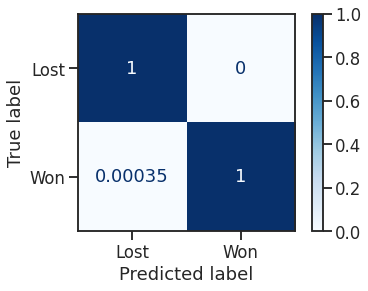

In [297]:
# Plot the confusion matrix
labels=['Lost','Won']
ConfusionMatrixDisplay.from_predictions(y_test, predictions,
                                        display_labels=labels,
                                        cmap='Blues',
                                        normalize='true');

# Logistic Regression

In [298]:
# Make an instance of the model with default parameters
logreg = LogisticRegression()
# Instantiate Standard Scaler because scaling is required for logistic regression
scaler = StandardScaler()
# Put scaler and model in a pipeline
logreg_pipe = make_pipeline(scaler, logreg)
# Training the model on the data, storing the information learned from the data
# Model is learning the relationship between X and y 
logreg_pipe.fit(X_train, y_train)
print(logreg_pipe.score(X_train, y_train))
print(logreg_pipe.score(X_test, y_test))

1.0
1.0


### L2

{0.0001: 0.8825747374091032,
 0.001: 0.9946135200646378,
 0.01: 1.0,
 0.1: 1.0,
 1: 1.0,
 10: 1.0}

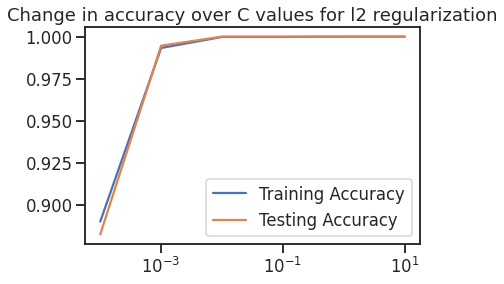

In [299]:
# create a list of c values and empty lists for scores
c_values = [0.0001, 0.001, 0.01, 0.1, 1, 10]
train_scores = []
test_scores = []
#iterative over the c values
for c in c_values:
  # instantiate a model with each value of c and fit it on the data
  log_reg = LogisticRegression(C=c, max_iter=10000, solver='saga', penalty='l2')
  log_reg_pipe = make_pipeline(scaler, log_reg)
  log_reg_pipe.fit(X_train, y_train)
 
  # add the training and testing scores to our scores lists
  train_scores.append(log_reg_pipe.score(X_train, y_train))
  test_scores.append(log_reg_pipe.score(X_test, y_test))
  
#plot the change in accuracy as we change the value of C
fig, ax = plt.subplots(1,1)
ax.plot(c_values, train_scores, label='Training Accuracy')
ax.plot(c_values, test_scores, label='Testing Accuracy')
ax.set_xticks(c_values)
ax.set_title('Change in accuracy over C values for l2 regularization')
ax.legend()
#set the x axis to a logarithmic scale to show the values of C in even intervals
ax.set_xscale('log')
# print a dictionary of values of C and accuracy scores
{c:score for c, score in zip(c_values, test_scores)}

The most accurate test appears at c = 0.001.

## Confusion Matrix

In [300]:
# Make a pipeline to scale the data and fit a model
logreg_pipe = make_pipeline(StandardScaler(), LogisticRegression(C=0.001, solver='saga', penalty='l2'))

# Train the model on the data
logreg_pipe.fit(X_train, y_train)

# class predictions (not predicted probabilities)
predictions = logreg_pipe.predict(X_test)
print('Predictions:')
predictions

Predictions:


array([1, 0, 1, ..., 1, 1, 1])

In [301]:
# actual values what an algorithm should have predicted
print('True Values')
y_test.values

True Values


array([1, 0, 1, ..., 1, 1, 1])

In [302]:
# actual values: y_test.values
# predictions: model predictions
cm = confusion_matrix(y_test.values, predictions)
cm

array([[ 848,   20],
       [   0, 2845]])

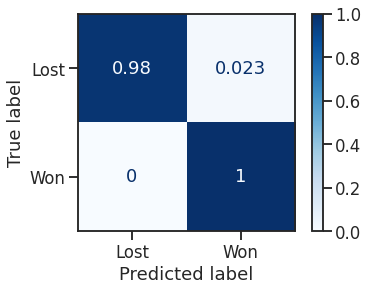

In [303]:
# Plot the confusion matrix
labels=['Lost','Won']
ConfusionMatrixDisplay.from_predictions(y_test, predictions,
                                        display_labels=labels,
                                        cmap='Blues',
                                        normalize='true');

# Feature Engineering


In this section, I will attempt to clean up the columns to be more useful than that of the previous model. The previous model took all columns that were not identifier variables.

**In this iteration, I will focus on Team1, and see if I can find patterns in the types of buying they do in rounds which leads to them winning a game.**

In [351]:
# making a copy of the dataframe
fe_df = Val_df.copy()
fe_df.head()

,Map,Team1_TotalRounds,Team2_TotalRounds,Team1_SideFirstHalf,Team1_RoundsFirstHalf,Team1_RoundsSecondtHalf,Team1_RoundsOT,Team2_RoundsFirstHalf,Team2_RoundsSecondtHalf,Team2_RoundsOT,...,Team2_PistolWon,Team2_Eco,Team2_EcoWon,Team2_SemiEco,Team2_SemiEcoWon,Team2_SemiBuy,Team2_SemiBuyWon,Team2_FullBuy,Team2_FullBuyWon,Team1_Won
0,0,13,7,0,7,6,0,5,2,0,...,0.0,4.0,0.0,2.0,0.0,4.0,1.0,10.0,6.0,1
1,1,2,13,0,2,0,0,10,3,0,...,2.0,2.0,2.0,0.0,0.0,4.0,3.0,9.0,8.0,0
2,2,13,8,1,8,5,0,4,4,0,...,1.0,2.0,1.0,2.0,0.0,6.0,2.0,11.0,5.0,1
3,3,13,6,0,7,6,0,5,1,0,...,0.0,4.0,0.0,1.0,0.0,2.0,1.0,12.0,5.0,1
4,2,13,9,0,9,4,0,3,6,0,...,1.0,3.0,2.0,3.0,0.0,4.0,3.0,12.0,4.0,1


In [352]:
# reviewing column names to identify which ones are good candidates to drop
fe_df.columns

Index(['Map', 'Team1_TotalRounds', 'Team2_TotalRounds', 'Team1_SideFirstHalf',
       'Team1_RoundsFirstHalf', 'Team1_RoundsSecondtHalf', 'Team1_RoundsOT',
       'Team2_RoundsFirstHalf', 'Team2_RoundsSecondtHalf', 'Team2_RoundsOT',
       'Team1_PistolWon', 'Team1_Eco', 'Team1_EcoWon', 'Team1_SemiEco',
       'Team1_SemiEcoWon', 'Team1_SemiBuy', 'Team1_SemiBuyWon',
       'Team1_FullBuy', 'Team1_FullBuyWon', 'Team2_PistolWon', 'Team2_Eco',
       'Team2_EcoWon', 'Team2_SemiEco', 'Team2_SemiEcoWon', 'Team2_SemiBuy',
       'Team2_SemiBuyWon', 'Team2_FullBuy', 'Team2_FullBuyWon', 'Team1_Won'],
      dtype='object')

Keep:
- Map
- Team1_SideFirstHalf
- Team1_RoundsFirstHalf
- Team1_PistolWon
- Team1_FullBuyWon
- Team1_Won


In [353]:
# Creating a list
drop_col = [
            # 'Map',
            'Team1_TotalRounds',
            'Team2_TotalRounds',
            # 'Team1_RoundsFirstHalf',
            'Team1_RoundsSecondtHalf',
            'Team1_RoundsOT',
            'Team2_RoundsFirstHalf',
            'Team2_RoundsSecondtHalf',
            'Team2_RoundsOT',
            # 'Team1_PistolWon',
            'Team1_Eco',
            'Team1_EcoWon',
            'Team1_SemiEco',
            'Team1_SemiEcoWon',
            'Team1_SemiBuy',
            'Team1_SemiBuyWon',
            'Team1_FullBuy',
            # 'Team1_FullBuyWon',
            'Team2_PistolWon',
            'Team2_Eco',
            'Team2_EcoWon',
            'Team2_SemiEco',
            'Team2_SemiEcoWon',
            'Team2_SemiBuy',
            'Team2_SemiBuyWon',
            'Team2_FullBuy',
            'Team2_FullBuyWon',
            # 'Team1_Won'
            ]

fe_df = fe_df.drop(columns=drop_col)

fe_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14850 entries, 0 to 14849
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Map                    14850 non-null  int64  
 1   Team1_SideFirstHalf    14850 non-null  int64  
 2   Team1_RoundsFirstHalf  14850 non-null  int64  
 3   Team1_PistolWon        14850 non-null  float64
 4   Team1_FullBuyWon       14850 non-null  float64
 5   Team1_Won              14850 non-null  int64  
dtypes: float64(2), int64(4)
memory usage: 696.2 KB


In [354]:
fe_df.describe()

,Map,Team1_SideFirstHalf,Team1_RoundsFirstHalf,Team1_PistolWon,Team1_FullBuyWon,Team1_Won
count,14850.000000,14850.000000,14850.000000,14850.000000,14850.000000,14850.000000
mean,2.803636,0.491785,7.111919,1.150168,7.973266,0.769832
std,1.521069,0.499949,2.392549,0.702263,2.656565,0.420955
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,5.000000,1.000000,7.000000,1.000000
50%,3.000000,0.000000,7.000000,1.000000,8.000000,1.000000
75%,4.000000,1.000000,9.000000,2.000000,10.000000,1.000000
max,6.000000,1.000000,12.000000,2.000000,19.000000,1.000000


Since teams always play 2 pistol rounds in a match, I will divide it by 2 and make a new column while deleting the old column.

In [355]:
fe_df['Team1_MeanPistolWon'] = fe_df['Team1_PistolWon'] / 2
fe_df = fe_df.drop(columns='Team1_PistolWon')
fe_df.head()

,Map,Team1_SideFirstHalf,Team1_RoundsFirstHalf,Team1_FullBuyWon,Team1_Won,Team1_MeanPistolWon
0,0,0,7,8.0,1,1.0
1,1,0,2,1.0,0,0.0
2,2,1,8,9.0,1,0.5
3,3,0,7,8.0,1,1.0
4,2,0,9,11.0,1,0.5


I will subtract the 'Team1_MeanPistolWon' from the 'Team1_RoundsFirstHalf' to create a new column for their rounds won besides the pistol rounds.

In [356]:
fe_df['Team1_NonPistolWonFirstHalf'] = fe_df['Team1_RoundsFirstHalf'] - fe_df['Team1_MeanPistolWon']
fe_df = fe_df.drop(columns='Team1_RoundsFirstHalf')
fe_df.head()

,Map,Team1_SideFirstHalf,Team1_FullBuyWon,Team1_Won,Team1_MeanPistolWon,Team1_NonPistolWonFirstHalf
0,0,0,8.0,1,1.0,6.0
1,1,0,1.0,0,0.0,2.0
2,2,1,9.0,1,0.5,7.5
3,3,0,8.0,1,1.0,6.0
4,2,0,11.0,1,0.5,8.5


I will keep the Team1_FullBuyWon because those rounds are easy to understand in context of a match. Those rounds are considered very important to a team and have a large impact on the outcome of a game.

## Process Feature Engineered Data

In [357]:
# Reviewing data before more processing
fe_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14850 entries, 0 to 14849
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Map                          14850 non-null  int64  
 1   Team1_SideFirstHalf          14850 non-null  int64  
 2   Team1_FullBuyWon             14850 non-null  float64
 3   Team1_Won                    14850 non-null  int64  
 4   Team1_MeanPistolWon          14850 non-null  float64
 5   Team1_NonPistolWonFirstHalf  14850 non-null  float64
dtypes: float64(3), int64(3)
memory usage: 696.2 KB


In [358]:
X = fe_df.drop(columns='Team1_Won')
y = fe_df['Team1_Won']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Random Forest Classifier

In [359]:
# Make an Instance
rf = RandomForestClassifier(random_state = 42)

In [360]:
# Fit data
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [361]:
# Predict the value for y
rf.predict(X_test)

array([1, 0, 1, ..., 1, 1, 1])

In [362]:
# Evaluate the performacerf_train_score = rf.score(X_train, y_train)
rf_train_score = rf.score(X_train, y_train)
rf_test_score = rf.score(X_test, y_test)
print(rf_train_score)
print(rf_test_score)

0.9428032683846638
0.9100457850794506


**The model has great scores and does not appear to be overfit. More work should be done to continue to tune this model.**

In [363]:
# I will start by setting the max depth to 2
rf_2 = RandomForestClassifier(max_depth = 2, random_state = 42)
rf_2.fit(X_train, y_train)
rf_2_train_score = rf_2.score(X_train, y_train)
rf_2_test_score = rf_2.score(X_test, y_test)
print(rf_2_train_score)
print(rf_2_test_score)

0.8984466193768519
0.8901158093186103


**The scores dropped slightly so there is obviously a better depth than 2.**

In [364]:
# I am going to find out what is the max depth
est_depths = [estimator.get_depth() for estimator in rf.estimators_]
max(est_depths)

23

The max depth is 23.

In [365]:

# I will try different values for max depth to continue
# evaluating the dataset.

depths = range(1, max(est_depths))
scores = pd.DataFrame(index=depths, columns=['Test Score'])
for depth in depths:    
   model = RandomForestClassifier(max_depth=depth, random_state=42)
   model.fit(X_train, y_train)
   scores.loc[depth, 'Train Score'] = model.score(X_train, y_train)
   scores.loc[depth, 'Test Score'] = model.score(X_test, y_test)
   scores.head()

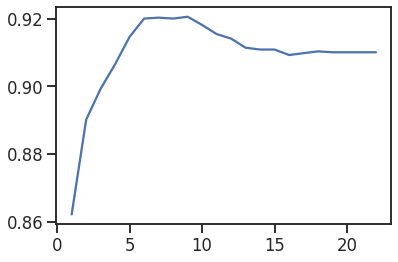

In [366]:
# I will plot the different scores by depth
plt.plot(scores['Test Score']);

It appears around the depth 8 might yield the best results.

In [367]:
# I will look at the scores and sort them from highest to lowest
sorted_scores = scores.sort_values(by='Test Score', ascending=False)
sorted_scores.head(10)

,Test Score,Train Score
9,0.920549,0.935530
7,0.92028,0.930502
6,0.920011,0.928975
8,0.920011,0.933016
10,0.918126,0.937416
11,0.915432,0.939840
5,0.914624,0.923498
12,0.914086,0.941187
13,0.911392,0.942175
14,0.910854,0.942713


I will use a depth of **9** because neither score is *perfect*. I do not want to overfit the model by having a perfect score.

### Tuning n_estimators

In [375]:
# choose a couple of values for n_estimators to save time
# you can use another loop later to narrow down the best number
# by trying numbers close to the best one
n_ests = [2, 3, 4, 5, 6, 7, 8, 9, 10]
scores2 = pd.DataFrame(index=n_ests, columns=['Test Score', 'Train Score'])
for n in n_ests:
   model = RandomForestClassifier(max_depth=9, n_estimators=n, random_state=42)
   model.fit(X_train, y_train)
   scores2.loc[n, 'Train Score'] = model.score(X_train, y_train)
   scores2.loc[n, 'Test Score'] = model.score(X_test, y_test)
scores2.head()

,Test Score,Train Score
2,0.91247,0.930233
3,0.91624,0.932836
4,0.915163,0.933914
5,0.916779,0.933824
6,0.916779,0.935171


In [376]:
sorted_scores2 = scores2.sort_values(by='Test Score', ascending=False)
sorted_scores2.head()

,Test Score,Train Score
8,0.918395,0.935261
7,0.917318,0.935081
9,0.917318,0.935081
5,0.916779,0.933824
6,0.916779,0.935171


Using a max depth of 9 and a value of 8 for the n estimators, the model should be very accurate. This model looks much better in regards to overfitting than the previous Random Forest Classifier.

In [379]:
# Make a pipeline to scale the data and fit a model
rf_pipe = make_pipeline(StandardScaler(), RandomForestClassifier(max_depth=9, n_estimators=8, random_state=42))

# Train the model on the data
rf_pipe.fit(X_train, y_train)

# class predictions (not predicted probabilities)
predictions = rf_pipe.predict(X_test)
print('Predictions:')
predictions

Predictions:


array([1, 0, 1, ..., 1, 1, 1])

In [380]:
# actual values what an algorithm should have predicted
print('True Values')
y_test.values

True Values


array([1, 0, 1, ..., 1, 1, 1])

In [381]:
# actual values: y_test.values
# predictions: model predictions
cm = confusion_matrix(y_test.values, predictions)
cm

array([[ 634,  234],
       [  69, 2776]])

In [384]:
cm_df = pd.DataFrame(cm)
cm_df

,0,1
0,634,234
1,69,2776


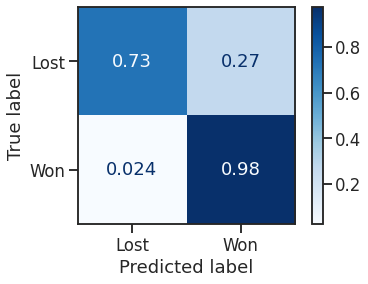

In [385]:
# Plot the confusion matrix
labels=['Lost','Won']
ConfusionMatrixDisplay.from_predictions(y_test, predictions,
                                        display_labels=labels,
                                        cmap='Blues',
                                        normalize='true');

# Decision on Production Model

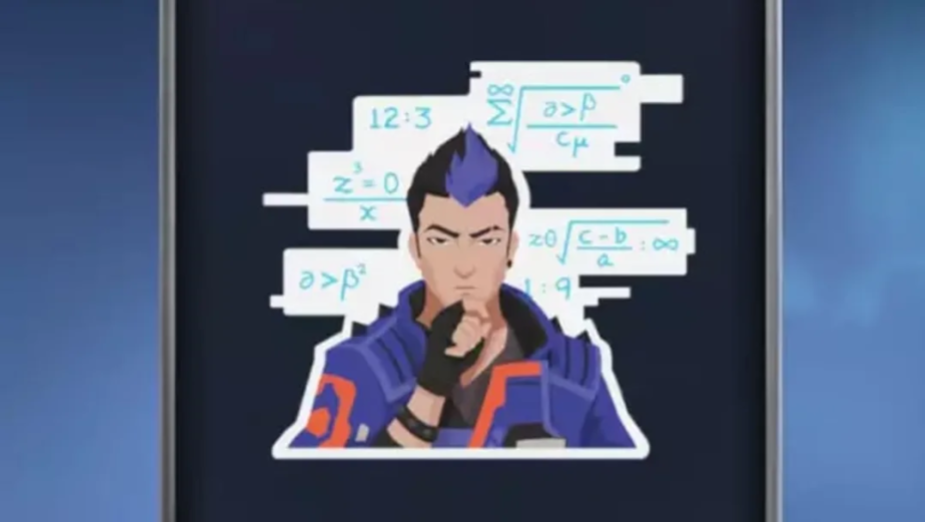




[Above Image Source](https://www.dbltap.com/posts/valorant-200-iq-spray-how-to-claim-01f51ah5yccf)

Both models were accurate to a strong degree, the models using the data not feature engineered had an incredible high level to the point that I would consider it *overfit*. The feature engineered model was still a strong model; however, it did not appear to be over fit by any means. Lets analyze the Feature Engineered Model using a Random Forest Classifier with a depth of 9 and n_estimator of 8.

---

**Strengths and Weaknesses of Using the Feature Engineered Random Forest Classifier**

|Strengths|Weaknesses|
|---|---|
|Teams that won were predicted to win around 98% of the time|Teams that lost were predicted to lose only around 73% of the time|
|The features seem pretty actionable for teams to implement|Teams don't always have control of the map they play on and the side the start on in the first half|

---
I believe a professional organization could utilize a model like this with similar features. Their players and coaches could work on areas that lead to the losses, things such as: focusing on winning the pistol round on specific maps depending if they are on attack or defend; it could give players confidence if they do have a bad start knowing that they might play better during the full buy rounds.

In addition to Valorant eSport Orginazations using this model, the balance team that makes changes to the agents, weapons, and maps, could see data like this and see how it is skewed depeding on which team selects the map. They could also see how rounds won in the first half affect the outcome of the match.

---

With a future model, I would like to implement the team composition as well. There are currently 19 agents that can be selected by each team. I think putting this data into a similar model would be greatly beneficial to all stakeholders. These models should be updated frequently (~monthly) to add new data from professional matches happening pretty frequently and to account for the changes that are made by the balance team.